In [1]:
#step 1 :- import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#step 2:- Load data
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#step 3:-keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values

In [5]:
training_set.shape

(1509, 1)

In [6]:
#step 4:- feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
#taking the reference of past 60 days of data to predict the future stock price.
#It is observed that taking 60 days of past data gives us best results.
#In this data set 60 days of data means 3 months of data.
#Every month as 20 days of Stock price.
#X train will have data of 60 days prior to our date and y train will have data of one day after our date

X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train.shape

(1449, 60)

In [9]:
y_train.shape

(1449,)

In [10]:
X_train = np.reshape(X_train, newshape =
                     (X_train.shape[0], X_train.shape[1], 1))

In [11]:
X_train.shape

(1449, 60, 1)

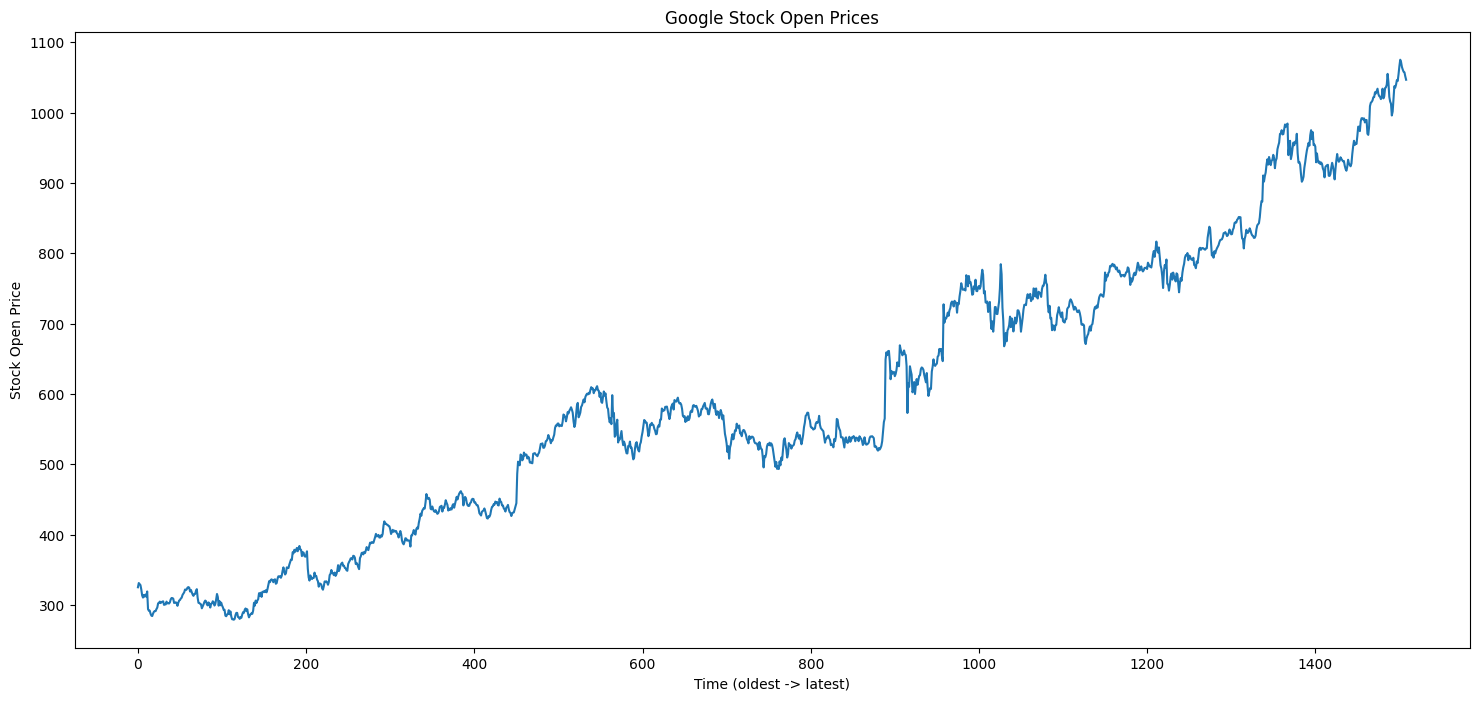

In [12]:
#step 5 :-  Exploratory Data Analysis
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

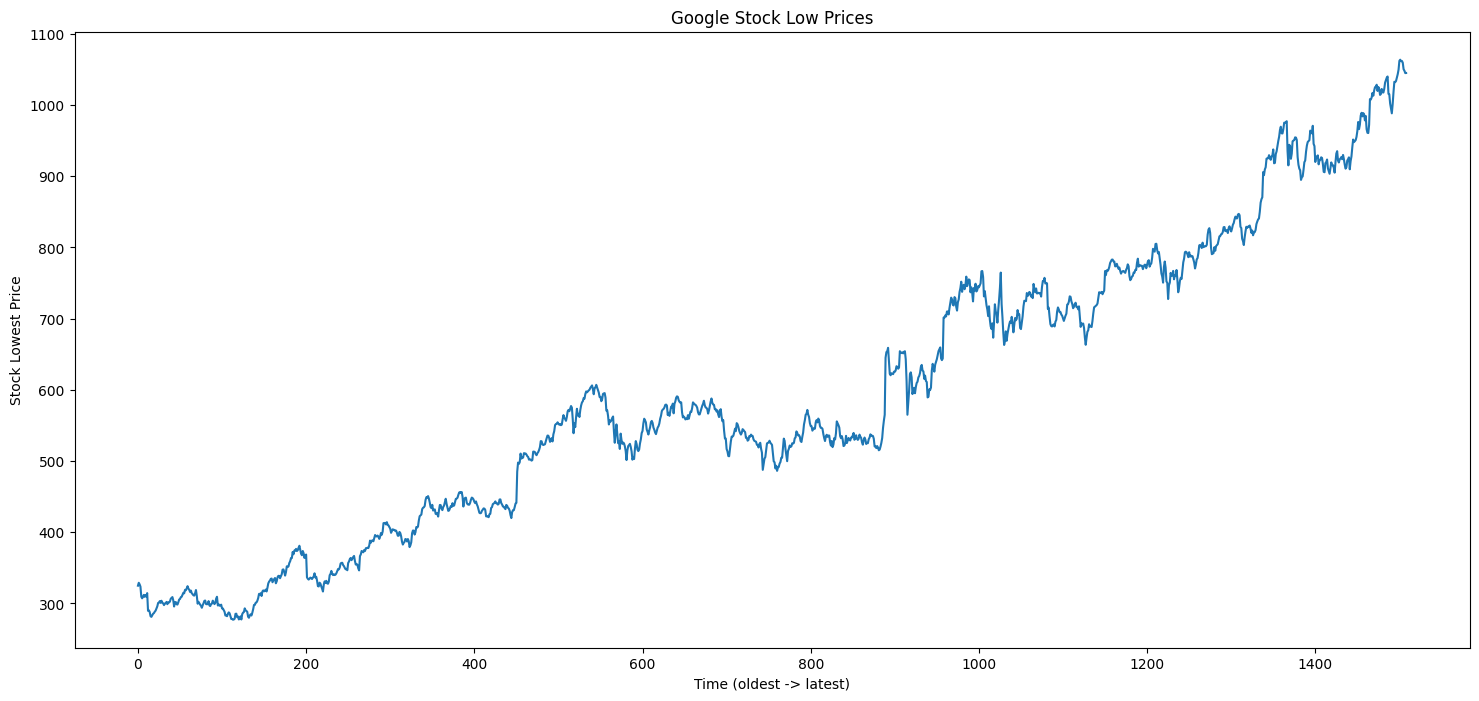

In [13]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Low'])
plt.title("Google Stock Low Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Price")
plt.show()

In [16]:
#step 6:- Create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


#build the model
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))



#Compile the model
regressor.compile(
  optimizer = 'adam',
  loss = 'mean_squared_error')

 #fit the model
regressor.fit(
     x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - loss: 0.0584
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0040
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 0.0041
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 0.0040
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0030
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.0028
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0030
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0043
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - loss: 0.0025
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.0024
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0027
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0024
Epoch 13/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0024
Epoch 14/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0032
Epoch 15/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms

In [20]:
#step 7:- Model evaluation
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape


#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_stock_price = regressor.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step


In [21]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

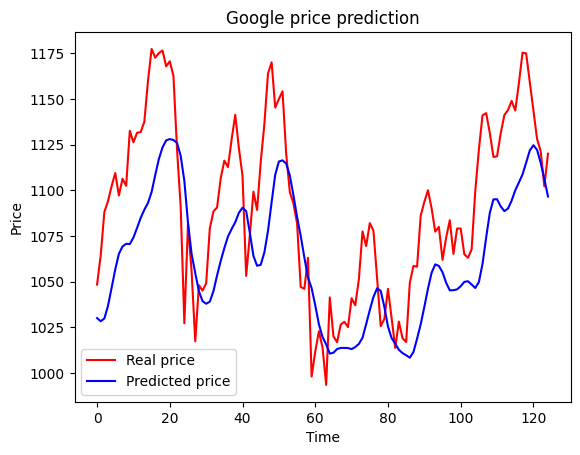

In [22]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()